<a href="https://colab.research.google.com/github/rajrawal/Predictive-Analysis-of-Sales-Data/blob/main/Predictive_Analysis_of_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Importing the dataset

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Data Preprocessing

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**If the missing value are less than 5% we can drop the rows of the missing values to calculate the percentage of the values missing**

In [ ]:
precent=train.isnull().sum()*100/len(train)
print(precent)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [ ]:
precent_test=train.isnull().sum()*100/len(train)
print(precent_test)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [ ]:
#replacing the missing values
#using linear interpolation to replace the values in "item weight"
train["Item_Weight"].fillna(train["Item_Weight"].interpolate(method = "linear"), inplace = True)

In [ ]:
#replacing the missing values
#using linear interpolation to replace the values in "item weight"
test["Item_Weight"].fillna(test["Item_Weight"].interpolate(method = "linear"), inplace = True)

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
mode_of_outlet_size_train = train.pivot_table(values = 'Outlet_Size',columns ='Outlet_Type', aggfunc =(lambda x: x.mode()[0]))

In [ ]:
mode_of_outlet_size_train

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
mode_of_outlet_size_test = test.pivot_table(values = 'Outlet_Size',columns ='Outlet_Type', aggfunc =(lambda x: x.mode()[0]))

In [ ]:
mode_of_outlet_size_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_value = train['Outlet_Size'].isnull()

In [ ]:
train.loc[missing_value, 'Outlet_Size'] = train.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size_train[x])

In [ ]:
missing_value1 = test['Outlet_Size'].isnull()

In [ ]:
test.loc[missing_value1, 'Outlet_Size'] = test.loc[missing_value1, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size_test[x])

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
train.replace({"Item_Fat_Content": {"LF" :"Low Fat", "low fat" : "Low Fat", "reg": "Regular" }}, inplace =True)

In [ ]:
test.replace({"Item_Fat_Content": {"LF" :"Low Fat", "low fat" : "Low Fat", "reg": "Regular" }}, inplace =True)

In [ ]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train["Item_Visibility"] =train["Item_Visibility"].replace(0,np.nan).interpolate(method = "linear")

In [ ]:
test["Item_Visibility"] =test["Item_Visibility"].replace(0,np.nan).interpolate(method = "linear")

In [ ]:
train["Item_Visibility"].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility, Length: 8405, dtype: int64

In [ ]:
#since most of the columns started with either FD, NC, DR, etc.
#i will use the first two letters to identify them

train["Item_Identifier"] = train["Item_Identifier"].apply(lambda x : x[:2])

In [ ]:
#since most of the columns started with either FD, NC, DR, etc.
#i will use the first two letters to identify them

test["Item_Identifier"] = test["Item_Identifier"].apply(lambda x : x[:2])

In [ ]:
train["Item_Identifier"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [ ]:
#To convert them to age
current_year = dt.datetime.today().year

In [ ]:
train["Outlet_Establishment_Year"] = current_year - train["Outlet_Establishment_Year"]

In [ ]:
test["Outlet_Establishment_Year"] = current_year - test["Outlet_Establishment_Year"]

In [ ]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,25,Medium,Tier 1,Supermarket Type1,3735.138


In [ ]:
test.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,25,Medium,Tier 1,Supermarket Type1


# Understanding the data set features through visualization

In [ ]:
sns.set() # this is used to give a theme to our graphs

<ipython-input-454-20e8980cf274>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Item_Weight"])


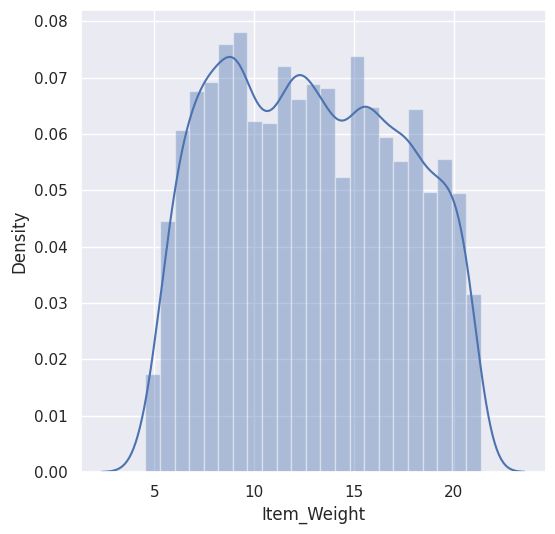

In [ ]:
plt.figure(figsize =(6,6))
sns.distplot(train["Item_Weight"])
plt.show()

<Figure size 600x600 with 0 Axes>

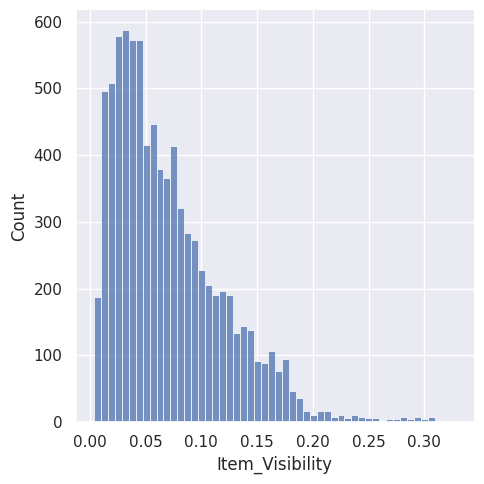

In [ ]:
plt.figure(figsize =(6,6))
sns.displot(train["Item_Visibility"])
plt.show()

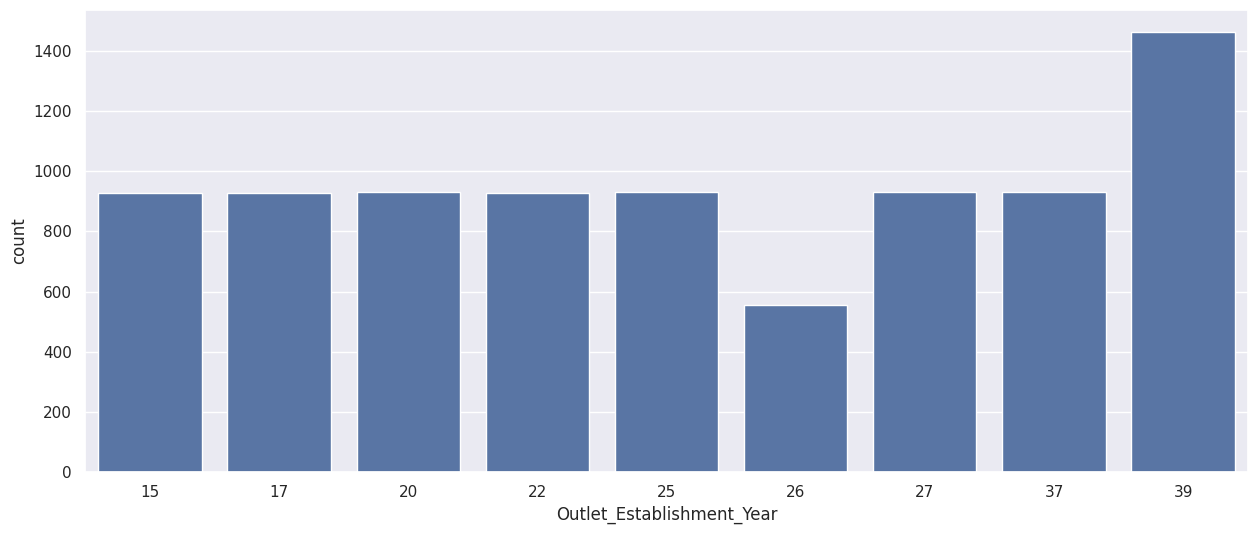

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data= train, x="Outlet_Establishment_Year" )
plt.show()

<Figure size 2500x600 with 0 Axes>

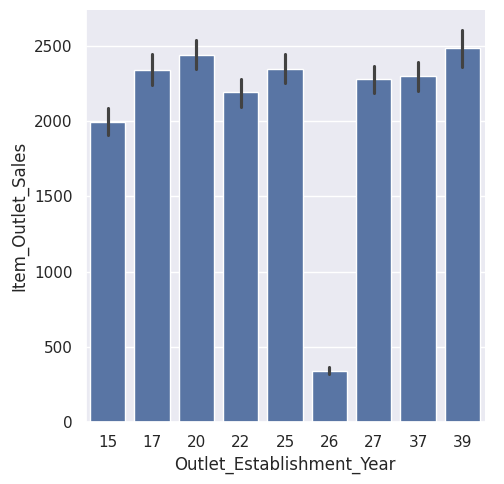

In [ ]:
plt.figure(figsize=(25,6))
sns.catplot(data= train, x="Outlet_Establishment_Year", y="Item_Outlet_Sales", kind="bar")
plt.show()

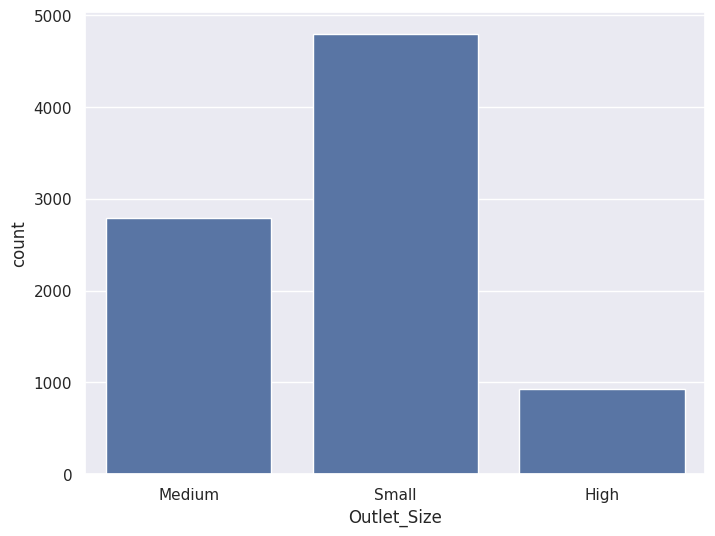

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data= train, x="Outlet_Size")
plt.show()

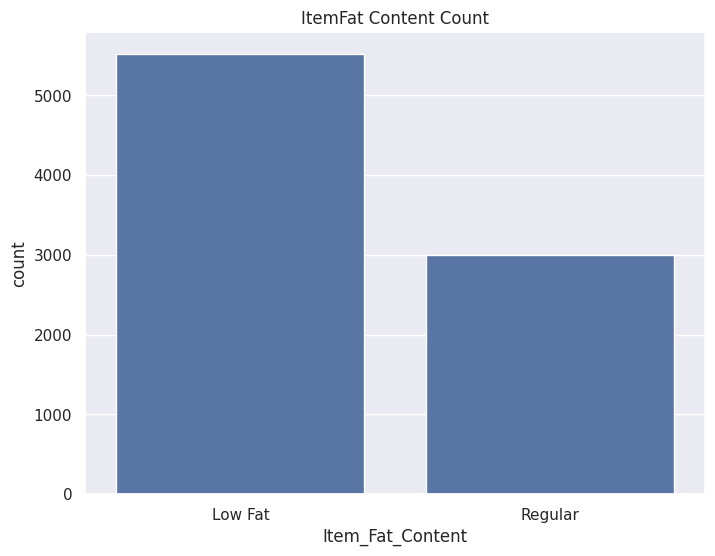

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data= train, x="Item_Fat_Content")
plt.title("ItemFat Content Count")
plt.show()

# ENCODING

we will encode the categorical columns we will be needing to numerical columns

In [ ]:
#LABEL ENCODING
coder = LabelEncoder()
train["Item_Identifier"] = coder.fit_transform(train["Item_Identifier"])
train["Item_Fat_Content"] = coder.fit_transform(train["Item_Fat_Content"])
train["Item_Type"] = coder.fit_transform(train["Item_Type"])
train["Outlet_Identifier"] = coder.fit_transform(train["Outlet_Identifier"])
train["Outlet_Size"] = coder.fit_transform(train["Outlet_Size"])
train["Outlet_Location_Type"] = coder.fit_transform(train["Outlet_Location_Type"])
train["Outlet_Type"] = coder.fit_transform(train["Outlet_Type"])

In [ ]:
#LABEL ENCODING
coder = LabelEncoder()
test["Item_Identifier"] = coder.fit_transform(test["Item_Identifier"])
test["Item_Fat_Content"] = coder.fit_transform(test["Item_Fat_Content"])
test["Item_Type"] = coder.fit_transform(test["Item_Type"])
test["Outlet_Identifier"] = coder.fit_transform(test["Outlet_Identifier"])
test["Outlet_Size"] = coder.fit_transform(test["Outlet_Size"])
test["Outlet_Location_Type"] = coder.fit_transform(test["Outlet_Location_Type"])
test["Outlet_Type"] = coder.fit_transform(test["Outlet_Type"])

In [ ]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,20.7500,0,0.007565,13,107.8622,9,25,1,0,1
1,1,8.3000,1,0.038428,4,87.3198,2,17,2,1,1
2,2,14.6000,0,0.099575,11,241.7538,0,26,2,2,0
3,1,7.3150,0,0.015388,13,155.0340,2,17,2,1,1
4,1,8.5575,1,0.118599,4,234.2300,5,39,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.5000,1,0.013496,13,141.3154,8,27,2,0,1
5677,1,7.6000,1,0.142991,15,169.1448,3,15,1,2,2
5678,2,10.0000,0,0.073529,8,118.7440,7,22,2,1,1
5679,1,15.3000,1,0.089124,3,214.6218,2,17,2,1,1


In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,25,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,15,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,25,1,0,1,2097.2700
3,1,19.200,1,0.015755,6,182.0950,0,26,2,2,0,732.3800
4,2,8.930,0,0.014751,9,53.8614,1,37,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,37,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,22,2,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,20,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,15,1,2,2,1845.5976


# Splitting the dataset into the Training set and Test set

In [ ]:

X = train.drop(columns=['Item_Outlet_Sales' ])
y = train['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test=sc.transform(test)

# Training the Random Forest Regression model on the Training set

In [ ]:
# Instantiate Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predicting the Test set results & Accuracy Check


In [ ]:
# Predict on test set
y_pred = random_forest_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = random_forest_model.score(X_test, y_test)

# Print evaluation metrics
print('Random Forest Regression - Mean Squared Error:', mse)
print('Random Forest Regression - R2 square:', r2 * 100, '%')

Random Forest Regression - Mean Squared Error: 1183504.4542420472
Random Forest Regression - R2 square: 56.456310215540704 %


# Visualising the Random Forest Regression model results

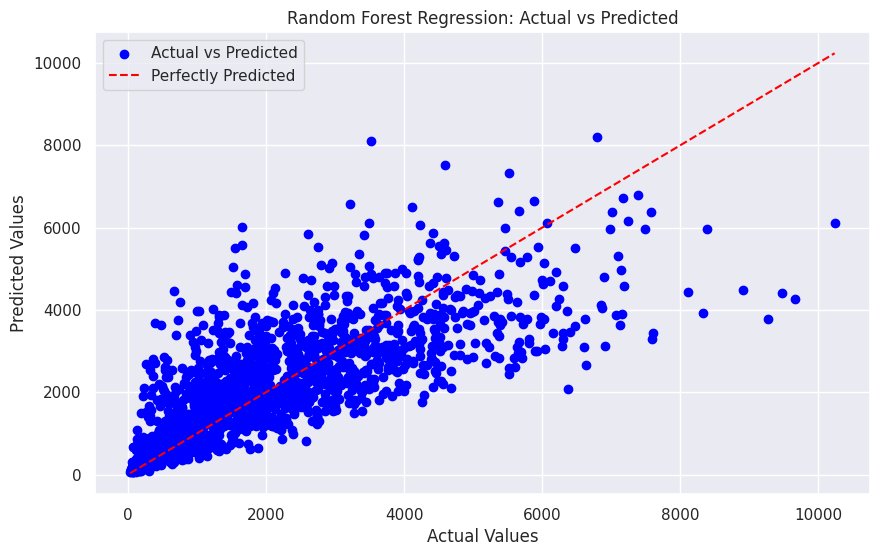

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfectly Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
print(y_pred)

[ 739.563982  893.73663   803.98679  ...  824.413534  549.81764
 1409.325492]


In [ ]:
test

array([[-0.18295445,  1.77696757, -0.74392811, ..., -0.66530465,
        -1.38348228, -0.25948864],
       [-0.18295445, -1.02636423,  1.34421592, ...,  0.79935376,
        -0.14965858, -0.25948864],
       [ 1.72728051,  0.39218921, -0.74392811, ...,  0.79935376,
         1.08416512, -1.50980208],
       ...,
       [ 1.72728051, -0.64357997, -0.74392811, ...,  0.79935376,
        -0.14965858, -0.25948864],
       [-0.18295445,  0.54980626,  1.34421592, ...,  0.79935376,
        -0.14965858, -0.25948864],
       [-0.18295445, -0.75616358,  1.34421592, ...,  0.79935376,
        -0.14965858, -0.25948864]])

# Predicting the Actual Test set results

In [ ]:
#test=test.drop(columns=['Item_Identifier', 'Outlet_Identifier' ])
y2=random_forest_model.predict(test)
print(y2)

[1744.455922 1151.381256  610.065882 ... 1812.747028 3743.107626
 1451.24426 ]
